<a href="https://colab.research.google.com/github/HildaPosada/SanJoseUSAChapter_BlueZoneProject/blob/main/Non_imputated_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualization of missing values in non-imputated data set

Resources: [Data set](https://drive.google.com/file/d/1na6VCexnzG0PKhoXwjbMVw7aZpxcfKuj/view?usp=drive_link) and [Medium blog](https://medium.com/@hildaecogreen/finding-and-visualizing-missing-data-in-python-using-missingno-and-seaborn-d4cf0452b9e9).

Dataset Shape: (12570, 105)
Dataset Preview:
   Year   GEOID  FIPS_Code     County_Name State_Abbreviation State_Name  \
0  2019  1001.0       1001  Autauga County                 AL    Alabama   
1  2019  1003.0       1003  Baldwin County                 AL    Alabama   
2  2019  1005.0       1005  Barbour County                 AL    Alabama   
3  2019  1007.0       1007     Bibb County                 AL    Alabama   
4  2019  1009.0       1009   Blount County                 AL    Alabama   

    Latitude  Longitude  median_age  pct_male  ...  uninsured_children  \
0  32.534922 -86.642730        38.2  0.486349  ...           -0.832587   
1  30.727686 -87.722573        43.0  0.486285  ...           -0.659031   
2  31.869585 -85.393206        40.4  0.529198  ...           -0.735714   
3  32.998625 -87.126481        40.9  0.540168  ...           -0.799952   
4  33.980877 -86.567369        40.7  0.494010  ...           -0.615266   

   homicides  pct_rural  ratio_of_population_to_prima

<Figure size 1200x600 with 0 Axes>

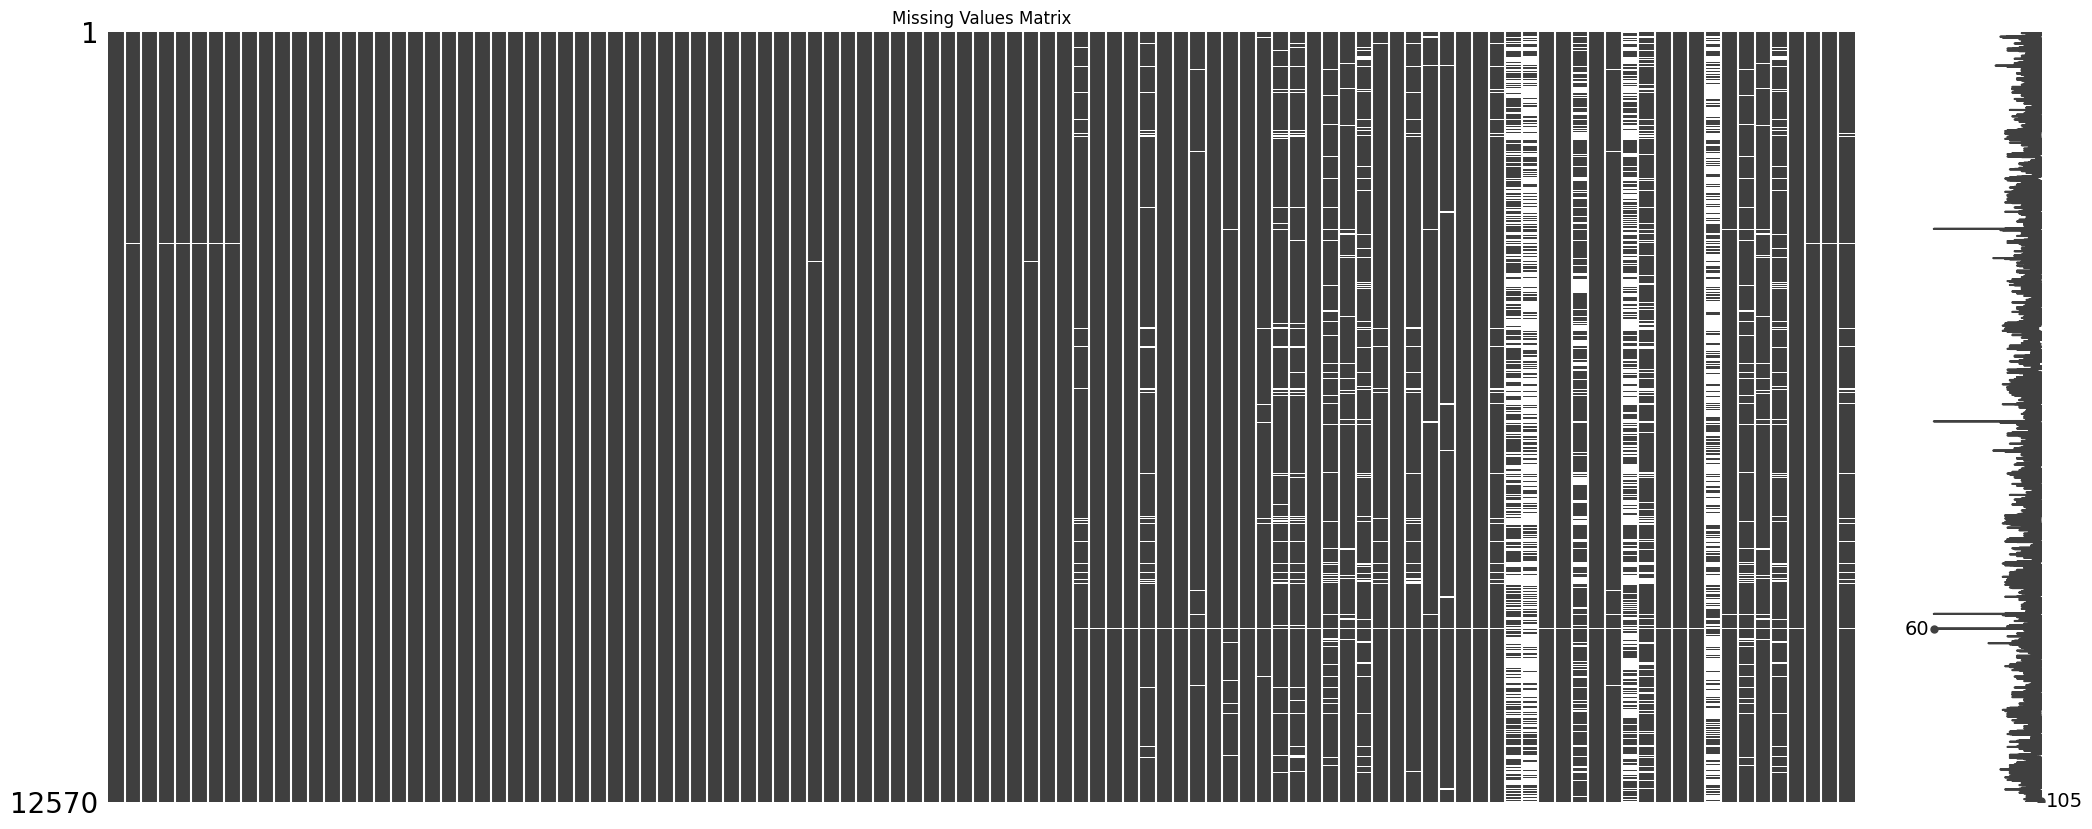

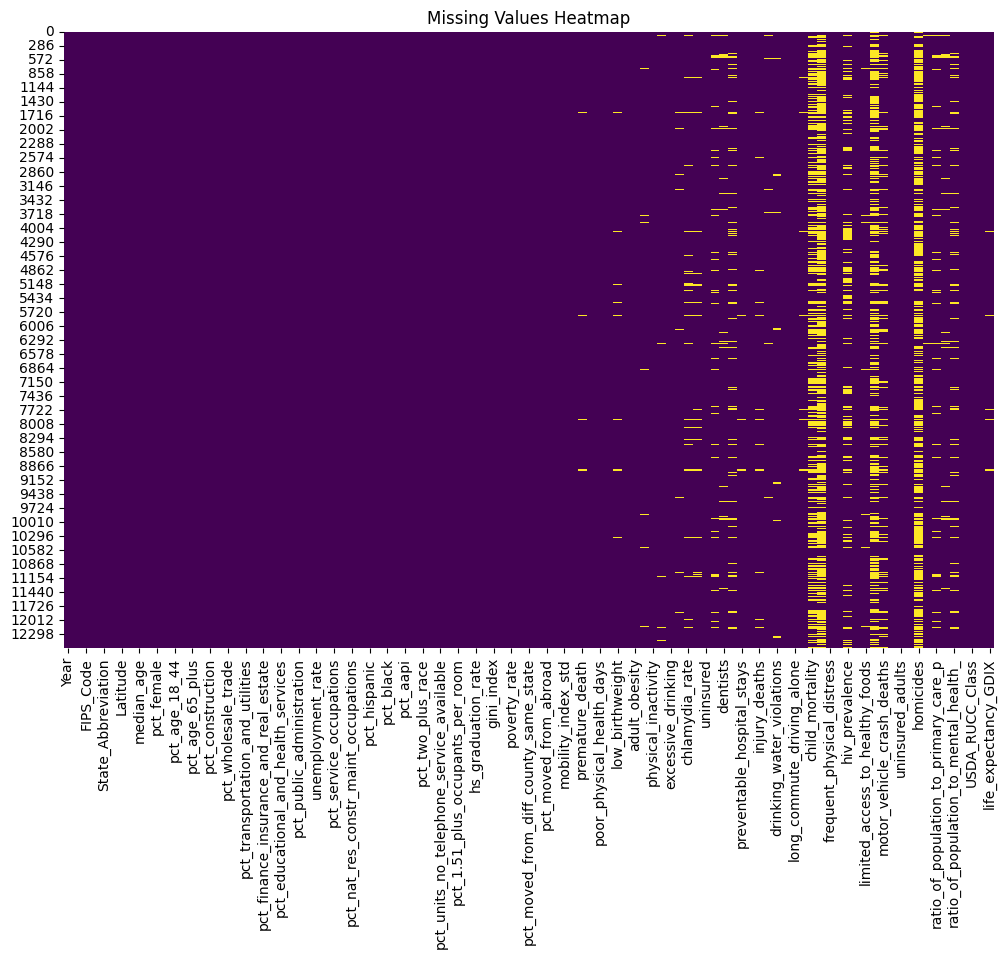

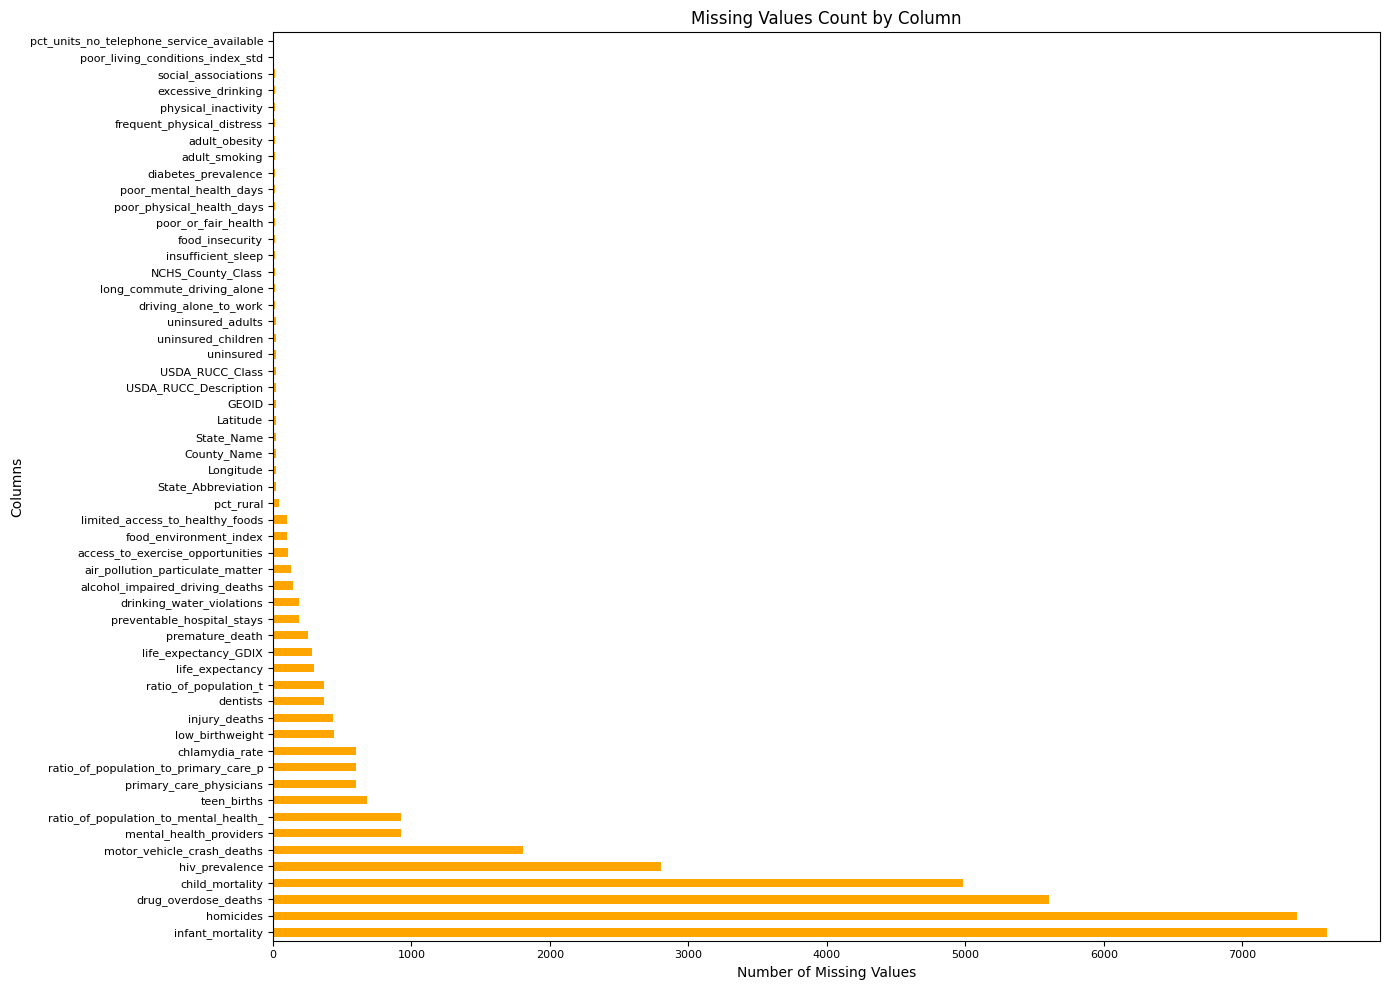

In [40]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import numpy as np
import textwrap

# Load the dataset
file_path = '/content/final_data_2019_2022_non_imputated_use-it-visualize_missing_values.csv' #Replace path accordingly

# Read the CSV file
df = pd.read_csv(file_path)

# Display basic information
print(f"Dataset Shape: {df.shape}")
print("Dataset Preview:")
print(df.head())

### Missing Data Visualizations ###

# Visualize the distribution of missing values using missingno matrix
plt.figure(figsize=(12, 6))
msno.matrix(df)
plt.title('Missing Values Matrix')
plt.show()

# Visualize missing values as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

# Bar plot of missing values for each column
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]
missing_values.sort_values(inplace=True)

plt.figure(figsize=(14, 10))
missing_values.plot(kind='barh', color='orange')
plt.title('Missing Values Count by Column', fontsize=12)  # Reduced font size
plt.xlabel('Number of Missing Values', fontsize=10)
plt.ylabel('Columns', fontsize=10)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

### Improved Missing Data Correlation Heatmap ###

# Compute the correlation matrix of missing values
corr_matrix = df.isnull().corr()

# Set a threshold for filtering annotations (show only stronger correlations)
threshold = 0.8
mask_values = np.abs(corr_matrix) >= threshold

# Mask the upper triangle to avoid redundancy
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Customize the color palette
cmap = sns.diverging_palette(220, 20, as_cmap=True)

# Set up the matplotlib figure with larger size and high DPI for zooming
plt.figure(figsize=(28, 26), dpi=300)

# Create the heatmap with only the most significant annotations
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, annot=mask_values, fmt=".2f",
            linewidths=.5, cbar_kws={"shrink": 0.5}, vmin=-1, vmax=1,
            annot_kws={"size": 3})  # Further reduced annotation font size

# Wrap long column names
wrapped_columns = [textwrap.fill(col, 15) for col in corr_matrix.columns]

# Set x and y axis labels with even smaller font sizes and rotation for readability
plt.xticks(np.arange(len(wrapped_columns)) + 0.5, wrapped_columns, rotation=65, ha='right', fontsize=3)  # Further reduced font size
plt.yticks(np.arange(len(wrapped_columns)) + 0.5, wrapped_columns, fontsize=3)  # Further reduced font size

# Add title and adjust layout
plt.title('Final Correlation Matrix for Missing Data Across Variables', fontsize=16)
plt.subplots_adjust(bottom=0.45)

# Save the plot as a high-resolution image
plt.tight_layout()
plt.savefig('correlation_matrix_high_res.png', dpi=400)  # Save as high-resolution PNG

# Show the plot
plt.show()



# Missing or null values in dataset

In [41]:
# Checking the first 5 rows of the dataset to see any missing values
print("Checking first 5 rows for missing values:")
print(df.head())

# Checking a random sample of 10 rows for missing values
print("\nChecking random 10 rows for missing values:")
print(df.sample(10))

# Check if there are any missing values in the entire dataframe
print("\nChecking if there are any missing values in the dataframe as a whole:")
print(df.isnull())

# Check if there are missing values across each column
print("\nChecking for missing values across each column:")
print(df.isnull().any())

# Print the columns with missing values
print("\nColumns with missing values:")
print([col for col in df.columns if df[col].isnull().any()])

# Count of missing values in each column
print("\nCount of missing values in each column:")
print(df.isna().sum())

# Total count of missing values in the dataset
print("\nTotal count of missing values in the dataset:")
print(df.isnull().values.sum())




Checking first 5 rows for missing values:
   Year   GEOID  FIPS_Code     County_Name State_Abbreviation State_Name  \
0  2019  1001.0       1001  Autauga County                 AL    Alabama   
1  2019  1003.0       1003  Baldwin County                 AL    Alabama   
2  2019  1005.0       1005  Barbour County                 AL    Alabama   
3  2019  1007.0       1007     Bibb County                 AL    Alabama   
4  2019  1009.0       1009   Blount County                 AL    Alabama   

    Latitude  Longitude  median_age  pct_male  ...  uninsured_children  \
0  32.534922 -86.642730        38.2  0.486349  ...           -0.832587   
1  30.727686 -87.722573        43.0  0.486285  ...           -0.659031   
2  31.869585 -85.393206        40.4  0.529198  ...           -0.735714   
3  32.998625 -87.126481        40.9  0.540168  ...           -0.799952   
4  33.980877 -86.567369        40.7  0.494010  ...           -0.615266   

   homicides  pct_rural  ratio_of_population_to_primary_